# **Importing the packages and data**

In this stage we are performing the below tasks

1.	**Import** packages.
2.	Set the **seed** to zero.
3.	Imported data using **google drive**.
4.	Loaded the dataset into **dataframe**(df).



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import random as rn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from imblearn.over_sampling import SMOTE

In [ ]:
#Setting the random seed to be zero
np.random.seed(0)
# The above is necessary for Numpy to generate fixed random numbers in a clear initial state.

rn.seed(0)
# The above is necessary for Python to generate a fixed random number in a clear initial state.

tf.random.set_seed(0)
#The above is necessary for Tensor to generate a fixed random number in a clear initial state.

 

*   The seed value is the previous value number generated by the generator. 
*   For the first time when there is no previous value, it uses current system time.
*   Using **seed()** function,we can generate the same random number every time with the same seed value.









In [ ]:
#Importing the data using Google Drive
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
#Reading/loading the dataset
df=pd.read_csv('bank.csv',sep = ';')

# **Exploratory Data Analysis(EDA)**
Exploratory Data Analysis refers to the critical process of performing initial investigations on data in order to discover patterns, to spot anomalies, and to check assumptions with the help of summary statistics and graphical representations.

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
df.shape

(4521, 17)

In [ ]:
#Checking whether there is any duplicate values in the data
print(df.duplicated().sum())

0


In [ ]:
#Removing the duplicate values in the data
df = df.drop_duplicates()

In [ ]:
#Checking whether there is any missing values in the data
df.isnull().values.any()

False

In [ ]:
#Checking whether there is any missing values in the data
print("# Missing job: {0}".format(len(df.loc[df['job'] == "unknown"])))
print("# Missing marital: {0}".format(len(df.loc[df['marital'] == "unknown"])))
print("# Missing education: {0}".format(len(df.loc[df['education'] == "unknown"])))
print("# Missing default: {0}".format(len(df.loc[df['default'] == "unknown"])))
print("# Missing balance: {0}".format(len(df.loc[df['balance'] == "unknown"])))
print("# Missing housing:: {0}".format(len(df.loc[df['housing'] == "unknown"])))
print("# Missing loan: {0}".format(len(df.loc[df['loan'] == "unknown"])))
print("# Missing contact: {0}".format(len(df.loc[df['contact'] == "unknown"])))
print("# Missing day: {0}".format(len(df.loc[df['day'] == "unknown"])))
print("# Missing month: {0}".format(len(df.loc[df['month'] == "unknown"])))
print("# Missing duration: {0}".format(len(df.loc[df['duration'] == "unknown"])))
print("# Missing campaign: {0}".format(len(df.loc[df['campaign'] == "unknown"])))
print("# Missing pdays: {0}".format(len(df.loc[df['pdays'] == "unknown"])))
print("# Missing previous: {0}".format(len(df.loc[df['previous'] == "unknown"])))
print("# Missing poutcome: {0}".format(len(df.loc[df['poutcome'] == "unknown"])))

# Missing job: 38
# Missing marital: 0
# Missing education: 187
# Missing default: 0
# Missing balance: 0
# Missing housing:: 0
# Missing loan: 0
# Missing contact: 1324
# Missing day: 0
# Missing month: 0
# Missing duration: 0
# Missing campaign: 0
# Missing pdays: 0
# Missing previous: 0
# Missing poutcome: 3705


In [ ]:
# Bank Term Deposit Subscription (Target) | Tranforming the target variable (Yes = 1 / No = 0)
df['y'] = 1 * (df['y']== 'yes')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


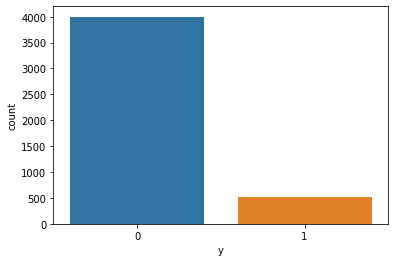

In [ ]:
#Visualizing the unbalanced data
sns.countplot(df['y'])

*   'No/0' is the majority class here
*   'Yes/1' is the minority class here

To balance the data,we can upsample the minority class

# **Handling imbalanced data**


 



*   The data that we have gathered is imbalanced. The training samples are not equally distributed among the target class. 
*   The model becomes more biased to the class which has a larger number of training instances. That degrades the model's prediction power.
*   To avoid this, we either upsample or downsample the classes.
*   Here, we choose to upsample the minority class (Yes/1).**Upsampling** is a procedure where the synthetically generated data points(corresponding to minority class) are injected into the dataset.







1.	We are upsampling the minority class (Yes) to balance the dataset and to keep the counts of both the minority and majority class labels the same.
2.	The hyperparameter that we can tune is n_samples which is the number of samples that we use to resample.
3.	n_samples is the number of rows from majority class.
4.	**df_balanced_data** is the **new pandas dataframe**.


In [ ]:
# Separating majority and minority classes
df_classe_majority = df[df.y==0]
df_classe_minority = df[df.y==1]

In [ ]:
#Shows the shape of the majority class
df_classe_majority.shape

(4000, 17)

In [ ]:
#Shows the shape of the minority class
df_classe_minority.shape

(521, 17)

**The unbalance in original data :**



*   Majority class data : 4000
*   Minority class data : 521



In [ ]:
# Upsampling the minority class

from sklearn.utils import resample

df_classe_minority_upsampled = resample(df_classe_minority, 
                                           replace = True,     
                                           n_samples = 4000)

df_balanced_data = pd.concat([df_classe_majority, df_classe_minority_upsampled])
#new Pandas dataframe with balanced data is df_balanced_data

In [ ]:
df_balanced_data.y.value_counts()

1    4000
0    4000
Name: y, dtype: int64

The balance of upsampled data:


*   Majority class data: 4000
*   Minority class data: 4000



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


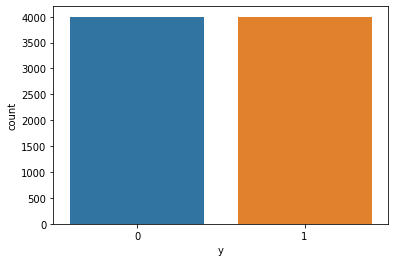

In [ ]:
#Visualizing the new pandas dataframe with balanced data
sns.countplot(df_balanced_data['y'])

Shows the count of minority and majority classes and we can see the count of minority and majority classes is equal and hence it is balanced.

## **Exploratory data analysis of new balanced dataframe (df_balanced_data)**

In [ ]:
df_balanced_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [ ]:
df_balanced_data.isnull().values.any()

False

In [ ]:
df_balanced_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df_balanced_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# **Feature Engineering ( Data Wrangling )**

**Feature engineering** refers to a process of selecting and transforming variables when creating a predictive model using machine learning or statistical modelling. The process involves a combination of data analysis, applying rules of thumb, and judgement. It is also referred as **data pre-processing**.


### **Label Encoding:**

Converts ordered,categorical data into numerical values.

In [ ]:
# Turning the categorical data into numeric data using a label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_var =['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
for i in cat_var:
      df_balanced_data[i]= le.fit_transform(df_balanced_data[i]) 

      df_balanced_data[i].head()

In [ ]:
from sklearn.model_selection import train_test_split

X = df_balanced_data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']] # Only numeric values

Y = df_balanced_data['y']

### **Standardization:**

The procedure during which the feature values are rescaled, so that they have the properties of **standard normal distribution**,that is,

*  ** Mean = 0**
*  ** Standard deviation = 1 **




In [ ]:
#Standardizing the data
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)

In [ ]:
#Splitting the data into training data and testing data set
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled,Y,test_size=0.3)

In [ ]:
#Shows the shape of training data set
X_train.shape,Y_train.shape

((5600, 16), (5600,))

In [ ]:
#Shows the shape of testing data set
X_test.shape,Y_test.shape

((2400, 16), (2400,))

Total data = 8000


*   Training data = 5600 (Training data is 70% of total data)
*   Testing data = 2400 (Testing data is 30% of total data)

# **Building a model to train,test and validate the dataset**

In [ ]:
#Creating a Sequential model with one input,output layer and three hidden layers

model=Sequential()
model.add(Dense(16,input_dim=16,activation='relu',name='Input'))
model.add(Dense(16,input_dim=16,activation='relu',name='Hidden_layer_1'))
model.add(Dense(8,input_dim=8,activation='relu',name='Hidden_layer_2'))
model.add(Dense(4,input_dim=4,activation='relu',name='Hidden_layer_3'))
model.add(Dense(1,input_dim=1,activation='sigmoid',name='Output_layer'))

In [ ]:
#Optimizing and compiling the model
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 16)                272       
_________________________________________________________________
Hidden_layer_1 (Dense)       (None, 16)                272       
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 8)                 136       
_________________________________________________________________
Hidden_layer_3 (Dense)       (None, 4)                 36        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 5         
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
None


### **Training,validating and testing the samples**

In [ ]:
#Training/Fitting the model
model.fit(X_train, Y_train, verbose=2, batch_size=8, epochs=100,validation_split=.2)

Epoch 1/100
560/560 - 14s - loss: 0.5819 - accuracy: 0.6975 - val_loss: 0.4957 - val_accuracy: 0.7679
Epoch 2/100
560/560 - 1s - loss: 0.4576 - accuracy: 0.7942 - val_loss: 0.4450 - val_accuracy: 0.8161
Epoch 3/100
560/560 - 1s - loss: 0.4172 - accuracy: 0.8188 - val_loss: 0.4310 - val_accuracy: 0.8205
Epoch 4/100
560/560 - 1s - loss: 0.4001 - accuracy: 0.8261 - val_loss: 0.4191 - val_accuracy: 0.8304
Epoch 5/100
560/560 - 1s - loss: 0.3815 - accuracy: 0.8350 - val_loss: 0.4126 - val_accuracy: 0.8366
Epoch 6/100
560/560 - 1s - loss: 0.3711 - accuracy: 0.8415 - val_loss: 0.4052 - val_accuracy: 0.8384
Epoch 7/100
560/560 - 1s - loss: 0.3557 - accuracy: 0.8538 - val_loss: 0.4097 - val_accuracy: 0.8411
Epoch 8/100
560/560 - 1s - loss: 0.3464 - accuracy: 0.8625 - val_loss: 0.4075 - val_accuracy: 0.8348
Epoch 9/100
560/560 - 1s - loss: 0.3355 - accuracy: 0.8594 - val_loss: 0.3884 - val_accuracy: 0.8562
Epoch 10/100
560/560 - 1s - loss: 0.3275 - accuracy: 0.8650 - val_loss: 0.3874 - val_accur

The result (accuracy) of our model after training is 95.13%

---



Validation accuracy of our model is 90.00%

In [ ]:
#Testing the model
results = model.evaluate(X_test, Y_test)

75/75 [==============================] - 0s 2ms/step - loss: 0.2747 - accuracy: 0.9096


The result (accuracy) of our model on the test set is 90.96%